# DATA CLEANING

In [1]:
import pandas as pd
import numpy as np

#importing the neccessary modules for data cleaning

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#modules for visualization

In [3]:
import warnings
warnings.filterwarnings('ignore')

#To prevent the uneccessary warnings during data reading from showing up

In [10]:
df = pd.read_csv('datasets/Original_Dataset.csv')

#Creating a dataframe object with the data from the csv file.

In [11]:
df.shape
#getting to know the dimensions of our dataframe

(98855, 128)

In [12]:
#Let us first remove the columns/attributes, who's values are not really important in our analysis.
#From visual analysis of the columns, we find that there are columns who's values does not 
#affect our analysis. So to make the dataset more meaningful, we remove those columns.

In [13]:
unecessary_columns = ['Respondent','AssessJob1','AssessJob2','AssessJob3','AssessJob4','AssessJob5', 'AssessJob6',
 'AssessJob7', 'AssessJob8','AssessJob9', 'AssessJob10','AssessBenefits1','AssessBenefits2','AssessBenefits3',
 'AssessBenefits4','AssessBenefits5','AssessBenefits6','AssessBenefits7','AssessBenefits8','AssessBenefits9',
 'AssessBenefits10','AssessBenefits11','JobContactPriorities1','JobContactPriorities3',
 'JobContactPriorities4','JobContactPriorities5','JobEmailPriorities1','JobEmailPriorities2','JobEmailPriorities3',
 'JobEmailPriorities4','JobEmailPriorities5','JobEmailPriorities6','JobEmailPriorities7','FormalEducation',
 'CareerSatisfaction','HopeFiveYears','UpdateCV','TimeAfterBootcamp',
 'AgreeDisagree1','AgreeDisagree2','AgreeDisagree3', 'HypotheticalTools1','HypotheticalTools2',
 'HypotheticalTools3', 'HypotheticalTools4','HypotheticalTools5']

In [14]:
df = df.drop(unecessary_columns,axis=1)

In [15]:
#Function to plot a bar graph of the missing values in each column of our dataset
def plot_nan_percentage(df):
    miss = df.isnull().sum().reset_index()
    miss[0] = (miss[0]*100)/df.shape[0]
    plt.figure(figsize=(13,6))
    ax = sns.barplot("index",0,data=miss,color="orange")
    plt.xticks(rotation = 90,fontsize=6)
    plt.title("percentage of missing values")
    ax.set_facecolor("k")
    ax.set_ylabel("percentage of missing values")
    ax.set_xlabel("variables")
    plt.show()

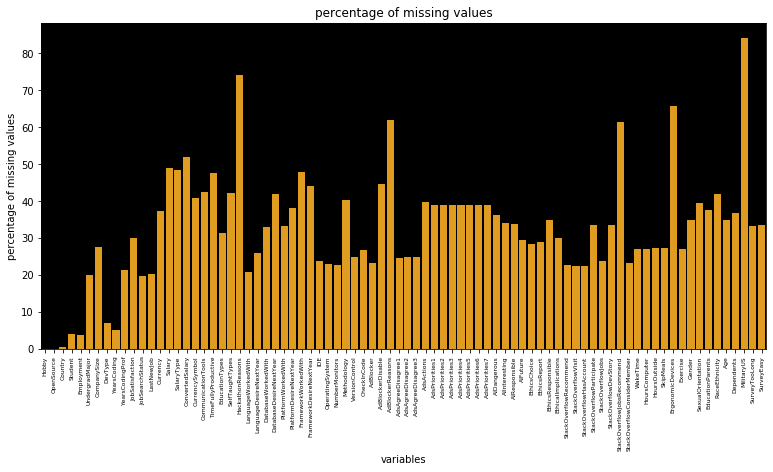

In [16]:
# Now let us check out the NAN values in our dataset.
# We will then apply a treshold and remove all columns with NAN values over a certain amount.

#LET US FIRST HAVE A VISUAL REPRESENTATION OF OUR DATASET.

plot_nan_percentage(df)

In [18]:
# From the above visualization we find out that some columns have a large number of missing values.
# Fixing the maximum threshold of nan values to be about 40%

l = [c for c in df if (df[c].isnull().sum() < 40000) ]
l.append('ConvertedSalary')
df = df[l]

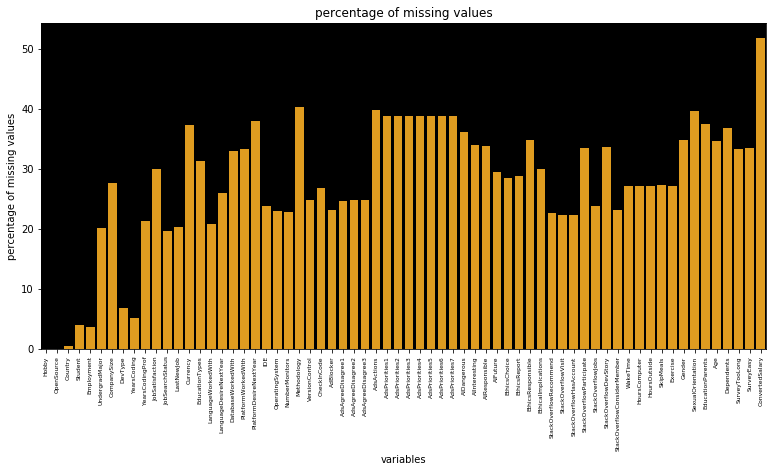

In [19]:
#Now our visualisation of the nan values in our dataset would now be
plot_nan_percentage(df)

In [20]:
#dropping rows with responses < 63
df = df.dropna(thresh= 64)

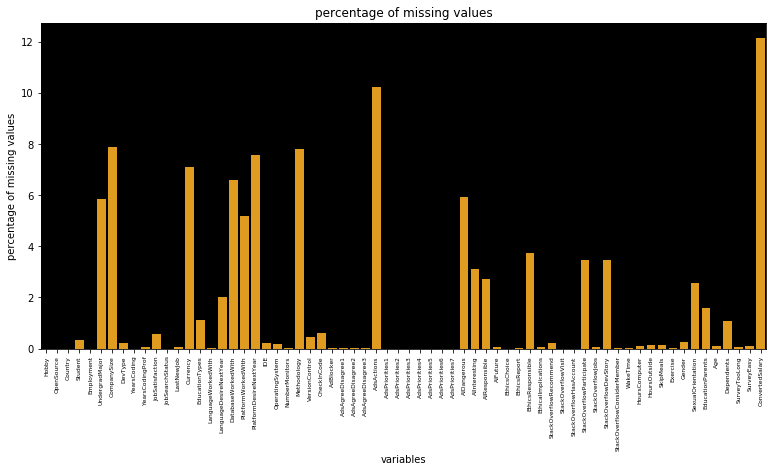

In [21]:
plot_nan_percentage(df)

In [22]:
#lets divide the rows into categorical and numerical

numerical_columns = ["ConvertedSalary"]   #need to be filled
categorical_columns = ["Hobby","OpenSource"]  #need to be filled

In [23]:
#rewriting missing numerical values with mean.
for i in numerical_columns:
    mean = df[i].mean()
    df = df.fillna(value = {i:mean})

In [24]:
#replacing missing categorical values with previous row elements
for i in categorical_columns:
    df[[i]] = df[[i]].fillna(method="ffill")

In [25]:
df = df.dropna()  #will be overwritten by the data handling done on top

In [26]:
#Now we write our clear data frame without nan values into our new csv file
df.to_csv('datasets/Clean_Dataset.csv')

In [27]:
df.shape
#getting to know the dimensions of our final dataframe

(10097, 66)

In [0]:
#END OF DATA CLEANING